
# Neural Network Training and Classification
### Siddhesh Ashok Gholap
#### Date: 14 April 2024

---


The results of the neural network analysis are presented below with visualizations and interpretations.

---


<b>  Part - (1) : Developed a neural network based classification network from scratch: </b>  Used MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this part is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are different varieties of neural network architecture to solve this task, this part uses only the feed forward network.  

<dt> <h6> 1. Loaded MNIST data and created train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divided the dataset into two segments: training and testing. Allocated 60,000 images for training and 10,000 images for testing
</dd> </h6>

<dt> <h6> 2. Designed a simple classification network </dt> </h6>

<dd> <h6> - Used three layer feed-forward neural network. Used 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flattened the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialized the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Computed the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Updated the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagated the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - Used stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluated the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assigned the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Computed the loss and accuaracy </dd> </h6>  
<dd> <h6> - Observations </dd> </h6>  





In [20]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)
Epoch 1/30 - Training Loss: 0.0573, Training Accuracy: 0.9098 - Validation Loss: 0.2263, Validation Accuracy: 0.9347
Epoch 2/30 - Training Loss: 0.0371, Training Accuracy: 0.9334 - Validation Loss: 0.1665, Validation Accuracy: 0.9532
Epoch 3/30 - Training Loss: 0.0296, Training Accuracy: 0.9465 - Validation Loss: 0.1325, Validation Accuracy: 0.9638
Epoch 4/30 - Training Loss: 0.0264, Training Accuracy: 0.9545 - Validation Loss: 0.1107, Validation Accuracy: 0.9708
Epoch 5/30 - Training Loss: 0.0239, Training Accuracy: 0.9609 - Validation Loss: 0.0956, Validation Accuracy: 0.9755
Epoch 6/30 - Training Loss: 0.0212, Training Accuracy: 0.9650 - Validation Loss: 0.0843, Validation Accuracy: 0.9785
Epoch 7/30 - Training Loss: 0.0187, Training Accuracy: 0.9680 - Validation Loss: 0.0759, Validation Accuracy: 0.9813
Epoch 8/30 - Training Loss: 0.0162, Training Accuracy: 0.9708 - Validatio

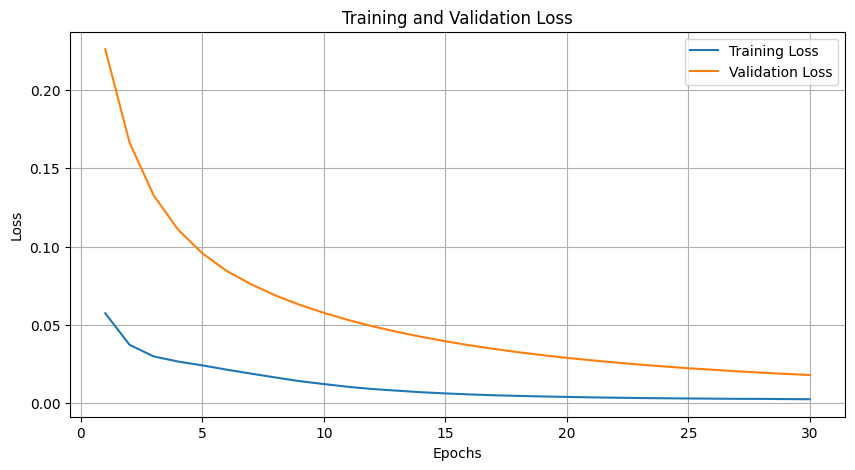

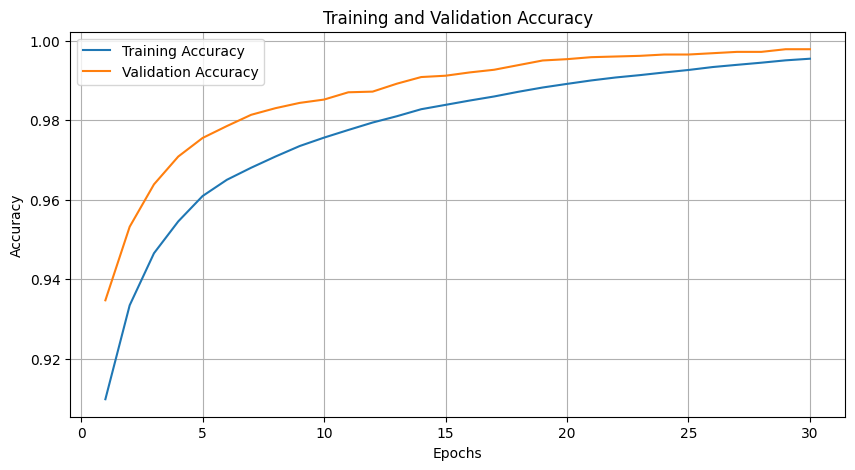

Test Accuracy: 0.9773


In [21]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data", mnist_traindata.shape)
print("Training labels", mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data", mnist_testdata.shape)
print("Testing labels", mnist_testlabel.shape)

##################################################
#Define the architecture
##################################################

#Complete the below function to implement ReLU activation function
def ReLu(inp):
    return np.maximum(0, inp)

#Complete the below function to implement gradient of ReLU activation function
def gradReLu(inp):
    return np.where(inp > 0, 1, 0)

#Complete the below function to implement softmax activation function
def softmax(inp):
    exps = np.exp(inp - np.max(inp))  # For numerical stability
    return exps / np.sum(exps, axis=1, keepdims=True)

#Complete the below function to implement forward propagation of data
def fwdPropagate(inputs, weights):
    # Inputs: input data, parameters of network
    W1, W2, W3 = weights

    # Flatten the input
    inputs_flatten = inputs.reshape(-1, 784)

    z1 = np.dot(inputs_flatten, W1.T)
    a1 = ReLu(z1)

    z2 = np.dot(a1, W2.T)
    a2 = ReLu(z2)

    z3 = np.dot(a2, W3.T)
    out = softmax(z3)

    # Return the requires outputs, i.e., final output and intermediate activations
    return out, [a1, a2]

#Complete the below function to compute the gradients
def computeGradients(inputs, targets, weights, activations):
    # Inputs: input data, targets, parameters of network, intermediate activations
    W1, W2, W3 = weights
    a1, a2 = activations

    out, _ = fwdPropagate(inputs, weights)  

    # Compute the loss
    m = inputs.shape[0]
    loss = -np.sum(targets * np.log(out)) / m

    # Compute the derivative of loss at parameters
    delta3 = out - targets
    dj_dw3 = np.dot(delta3.T, a2) / m
    delta2 = np.dot(delta3, W3) * gradReLu(a2)
    dj_dw2 = np.dot(delta2.T, a1) / m
    delta1 = np.dot(delta2, W2) * gradReLu(a1)
    dj_dw1 = np.dot(delta1.T, inputs.reshape(-1, 784)) / m

    # Return the gradients
    return [dj_dw1, dj_dw2, dj_dw3], loss

#Complete the below function to update the parameters using the above computed gradients
def applyGradients(weights, gradients, learning_rate):
    # Inputs: weights, gradients, and learning rate
    W1, W2, W3 = weights
    dj_dw1, dj_dw2, dj_dw3 = gradients

    W1 -= learning_rate * dj_dw1
    W2 -= learning_rate * dj_dw2
    W3 -= learning_rate * dj_dw3

    # Return the updated parameters
    return [W1, W2, W3]

#Complete the below function to complete the backpropagation step
def backPropagate(inputs, targets, weights, activations, learning_rate):
    # Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
    
    gradients, loss = computeGradients(inputs, targets, weights, activations)
    weights = applyGradients(weights, gradients, learning_rate)
    return weights, loss

##################################################
#Train the network
##################################################

#Complete the below function to complete the training of network

tr_loss_plot = []       #initialising lists for plotting
vl_loss_plot = []
tr_accuracy_plot = []
vl_accuracy_plot = []

def training(inputs, targets, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001):
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size

    # Split the training data into two parts: training and validation
    n_train_samples = int(train_val_split * n_samples)
    train_inputs = inputs[:n_train_samples]
    train_targets = targets[:n_train_samples]
    val_inputs = inputs[n_train_samples:]
    val_targets = targets[n_train_samples:]

    # Randomly initialize the weights
    W1 = np.random.randn(hidden_units, 784) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(n_classes, hidden_units) * 0.01
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        for batch in range(n_batches):
            start = batch * batch_size
            end = min((batch + 1) * batch_size, n_samples)
            inputs_batch = inputs[start:end]
            targets_batch = targets[start:end]

            # Forward propagation
            out, activations = fwdPropagate(inputs_batch, weights)

            # Backward propagation
            weights, loss = backPropagate(inputs_batch, targets_batch, weights, activations, learning_rate)

        # Compute outputs on training data
        train_out, _ = fwdPropagate(train_inputs, weights)
        train_preds = np.argmax(train_out, axis=1)
        train_acc = np.mean(train_preds == np.argmax(train_targets, axis=1))
        train_loss = loss

        # Compute outputs on validation data
        val_out, _ = fwdPropagate(val_inputs, weights)
        val_preds = np.argmax(val_out, axis=1)
        val_acc = np.mean(val_preds == np.argmax(val_targets, axis=1))
        val_loss = -np.sum(val_targets * np.log(val_out)) / val_inputs.shape[0]
        
        tr_loss_plot.append(train_loss)
        vl_loss_plot.append(val_loss)
        tr_accuracy_plot.append(train_acc)
        vl_accuracy_plot.append(val_acc)

        # Print the statistics of training and validation
        print(f"Epoch {epoch + 1}/{epochs} - Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f} - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    return weights


#Call the training function to train the network
targets = np.eye(10)[mnist_trainlabel]
trained_weights = training(mnist_traindata, targets)

epochs = range(1, len(tr_loss_plot) + 1)

# Plot 1: Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, tr_loss_plot, label='Training Loss')
plt.plot(epochs, vl_loss_plot, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, tr_accuracy_plot, label='Training Accuracy')
plt.plot(epochs, vl_accuracy_plot, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


##################################################
#Evaluate the performance on test data
##################################################

test_out, _ = fwdPropagate(mnist_testdata, trained_weights)
test_preds = np.argmax(test_out, axis=1)
test_accuracy = np.mean(test_preds == mnist_testlabel)
print(f"Test Accuracy: {test_accuracy:.4f}")

<b> Observations </b>

1. Training and validation loss decrease as number of epochs increase.

2. Training and validation accuracy increases as number of epochs increase.

3. Validation loss is greater than training by a great factor in each epoch.



<b> Part - (2) : Understanding activation functions: </b> In this part i used different activation functions for the classification task and compared their performances.

<dt> 1. Trained MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. Used SGD. </dt> <br>

<dt> 2. Reported the accuray on MNIST test data for all the experiments.</dt> 



Epoch 1/30 - Training Loss: 0.2436, Training Accuracy: 0.9185 - Validation Loss: 0.2241, Validation Accuracy: 0.9403 with ReLU activation
Epoch 2/30 - Training Loss: 0.1969, Training Accuracy: 0.9364 - Validation Loss: 0.1699, Validation Accuracy: 0.9527 with ReLU activation
Epoch 3/30 - Training Loss: 0.1749, Training Accuracy: 0.9505 - Validation Loss: 0.1376, Validation Accuracy: 0.9620 with ReLU activation
Epoch 4/30 - Training Loss: 0.1071, Training Accuracy: 0.9573 - Validation Loss: 0.1145, Validation Accuracy: 0.9710 with ReLU activation
Epoch 5/30 - Training Loss: 0.1332, Training Accuracy: 0.9640 - Validation Loss: 0.1001, Validation Accuracy: 0.9740 with ReLU activation
Epoch 6/30 - Training Loss: 0.1460, Training Accuracy: 0.9682 - Validation Loss: 0.0882, Validation Accuracy: 0.9780 with ReLU activation
Epoch 7/30 - Training Loss: 0.0666, Training Accuracy: 0.9716 - Validation Loss: 0.0819, Validation Accuracy: 0.9803 with ReLU activation
Epoch 8/30 - Training Loss: 0.1481

C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_23100\684473665.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-inp - 1e-6))


Epoch 6/30 - Training Loss: 2.1323, Training Accuracy: 0.4482 - Validation Loss: 3.3954, Validation Accuracy: 0.5043 with Sigmoid activation
Epoch 7/30 - Training Loss: 2.1203, Training Accuracy: 0.4516 - Validation Loss: 4.2517, Validation Accuracy: 0.4752 with Sigmoid activation
Epoch 8/30 - Training Loss: 2.1151, Training Accuracy: 0.4508 - Validation Loss: 4.9854, Validation Accuracy: 0.4488 with Sigmoid activation
Epoch 9/30 - Training Loss: 2.0500, Training Accuracy: 0.4441 - Validation Loss: 5.6170, Validation Accuracy: 0.4160 with Sigmoid activation
Epoch 10/30 - Training Loss: 1.9879, Training Accuracy: 0.4566 - Validation Loss: 5.9636, Validation Accuracy: 0.4070 with Sigmoid activation


C:\Users\Siddhesh\AppData\Local\Temp\ipykernel_23100\1806434530.py:35: RuntimeWarning: invalid value encountered in divide
  return exps / np.sum(exps, axis=1, keepdims=True)


Epoch 11/30 - Training Loss: 1.8633, Training Accuracy: 0.4662 - Validation Loss: nan, Validation Accuracy: 0.2197 with Sigmoid activation
Epoch 12/30 - Training Loss: 1.8295, Training Accuracy: 0.4708 - Validation Loss: nan, Validation Accuracy: 0.1117 with Sigmoid activation
Epoch 13/30 - Training Loss: 1.8431, Training Accuracy: 0.4973 - Validation Loss: nan, Validation Accuracy: 0.0978 with Sigmoid activation
Epoch 14/30 - Training Loss: 1.7795, Training Accuracy: 0.5193 - Validation Loss: nan, Validation Accuracy: 0.0978 with Sigmoid activation
Epoch 15/30 - Training Loss: 1.7231, Training Accuracy: 0.5199 - Validation Loss: nan, Validation Accuracy: 0.0978 with Sigmoid activation
Epoch 16/30 - Training Loss: 1.5911, Training Accuracy: 0.5329 - Validation Loss: nan, Validation Accuracy: 0.0978 with Sigmoid activation
Epoch 17/30 - Training Loss: 1.6497, Training Accuracy: 0.5410 - Validation Loss: nan, Validation Accuracy: 0.0978 with Sigmoid activation
Epoch 18/30 - Training Loss

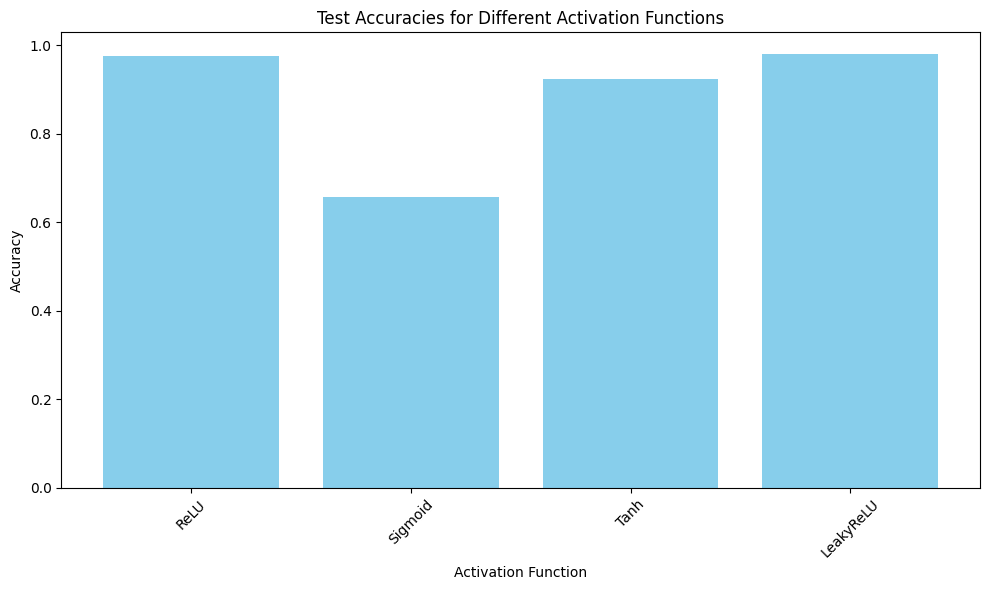

In [24]:
##################################################
#Train the network with different activation functions
##################################################

# Define functions for different activation functions

def sigmoid(inp):
    return 1 / (1 + np.exp(-inp - 1e-6))

def gradSigmoid(inp):
    return sigmoid(inp) * (1 - sigmoid(inp))

def tanh(inp):
    return np.tanh(inp)

def gradTanh(inp):
    return 1 - np.square(np.tanh(inp))

def LeakyReLU(inp, alpha=0.01):
    return np.where(inp > 0, inp, alpha * inp)

def gradLeakyReLU(inp, alpha=0.01):
    return np.where(inp > 0, 1, alpha)

def fwdPropagate_with_activation(activation_function, inputs, weights):
    # Inputs: input data, parameters of network
    W1, W2, W3 = weights

    # Flatten the input
    inputs_flatten = inputs.reshape(-1, 784)

    z1 = np.dot(inputs_flatten, W1.T)
    a1 = activation_function(z1)

    z2 = np.dot(a1, W2.T)
    a2 = activation_function(z2)

    z3 = np.dot(a2, W3.T)
    out = softmax(z3)

    # Return the required outputs, i.e., final output and intermediate activations
    return out, [a1, a2]

def computeGradients_with_activation(activation_function, grad_activation_function, inputs, targets, weights, activations):
     
    W1, W2, W3 = weights
    a1, a2 = activations

    # Forward propagation
    out, _ = fwdPropagate_with_activation(activation_function, inputs, weights)  # Add this line to get 'out'

    # Compute the loss
    m = inputs.shape[0]
    loss = -np.sum(targets * np.log(out)) / m

    # Compute the derivative of loss at parameters
    delta3 = out - targets
    dj_dw3 = np.dot(delta3.T, a2) / m
    delta2 = np.dot(delta3, W3) * grad_activation_function(a2)
    dj_dw2 = np.dot(delta2.T, a1) / m
    delta1 = np.dot(delta2, W2) * grad_activation_function(a1)
    dj_dw1 = np.dot(delta1.T, inputs.reshape(-1, 784)) / m

    # Return the gradients
    return [dj_dw1, dj_dw2, dj_dw3], loss

def backPropagate_with_activation(activation_function, grad_activation_function, inputs, targets, weights, activations, learning_rate):
    # Inputs: input data, targets, parameters of network, intermediate activations, learning rate of optimization algorithm
    gradients, loss = computeGradients_with_activation(activation_function, grad_activation_function, inputs, targets, weights, activations)
    weights = applyGradients(weights, gradients, learning_rate)
    return weights, loss


def train_with_activation_function(activation_function, grad_activation_function, inputs, targets, activation_name, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    
    # Split the training data into two parts: 90% for training and 10% for validation
    n_train_samples = int(train_val_split * n_samples)
    train_inputs = inputs[:n_train_samples]
    train_targets = targets[:n_train_samples]
    val_inputs = inputs[n_train_samples:]
    val_targets = targets[n_train_samples:]

    # Randomly initialize the weights
    W1 = np.random.randn(hidden_units, 784) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(n_classes, hidden_units) * 0.01
    weights = [W1, W2, W3]

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        shuffle_indices = np.random.permutation(n_samples)
        inputs_shuffled = inputs[shuffle_indices]
        targets_shuffled = targets[shuffle_indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = min((batch + 1) * batch_size, n_samples)
            inputs_batch = inputs_shuffled[start:end]
            targets_batch = targets_shuffled[start:end]

            # Forward propagation
            out, activations = fwdPropagate_with_activation(activation_function, inputs_batch, weights)

            # Backward propagation
            gradients, loss = computeGradients_with_activation(activation_function, grad_activation_function, inputs_batch, targets_batch, weights, activations)
            weights = applyGradients(weights, gradients, learning_rate)

        # Compute outputs on training data
        train_out, _ = fwdPropagate_with_activation(activation_function, train_inputs, weights)
        train_preds = np.argmax(train_out, axis=1)
        train_acc = np.mean(train_preds == np.argmax(train_targets, axis=1))
        train_loss = loss
        
        # Compute outputs on validation data
        val_out, _ = fwdPropagate(val_inputs, weights)
        val_preds = np.argmax(val_out, axis=1)
        val_acc = np.mean(val_preds == np.argmax(val_targets, axis=1))
        val_loss = -np.sum(val_targets * np.log(val_out + 1e-5)) / val_inputs.shape[0]

        # Print the statistics of training
        print(f"Epoch {epoch + 1}/{epochs} - Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f} - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f} with {activation_name} activation")

    return weights

# Train the network with different activation functions
activation_functions = {
    "ReLU": (ReLu, gradReLu),
    "Sigmoid": (sigmoid, gradSigmoid),
    "Tanh": (tanh, gradTanh),
    "LeakyReLU": (LeakyReLU, gradLeakyReLU)
}

trained_weights_dict = {}
for activation_name, (activation_function, grad_activation_function) in activation_functions.items():
    targets = np.eye(10)[mnist_trainlabel]  # One-hot encode the targets
    trained_weights = train_with_activation_function(activation_function, grad_activation_function, mnist_traindata, targets, activation_name)
    trained_weights_dict[activation_name] = trained_weights

##################################################
#Evaluate the performance on MNIST test data
##################################################

# Evaluate the performance on test data for different activation functions
test_accuracy_dict = {}
for activation_name, weights in trained_weights_dict.items():
    test_out, _ = fwdPropagate_with_activation(activation_functions[activation_name][0], mnist_testdata, weights)
    test_preds = np.argmax(test_out, axis=1)
    test_accuracy = np.mean(test_preds == mnist_testlabel)
    test_accuracy_dict[activation_name] = test_accuracy

# Report the accuracies
print("Test Accuracies:")
for activation_name, test_accuracy in test_accuracy_dict.items():
    print(f"{activation_name}: {test_accuracy:.4f}")
    

#plotting

# Extract activation names and accuracies
activation_names = list(test_accuracy_dict.keys())
accuracies = list(test_accuracy_dict.values())

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(activation_names, accuracies, color='skyblue')

# Adding title and labels
plt.title('Test Accuracies for Different Activation Functions')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')

# Rotating x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


<b> Observations </b>

1. ReLU and LeakyReLU gives the best performance among all the activation function.

2. Sigmoid function do not seem to converge in the given epochs.

3. Tanh function gives sufficiently good accuracy for any given epochs.

4. Tanh and sigmoid functions gives a greater loss comparatively.



<b> Part - (3) : Understanding optimization algorithms: </b> In this part i tried to use different optimization algorithm apart from SGD.

<dt> 1. Using the best activation function from Part - (2), trained the classification network using Adam optimization algorithm. </dt> <br>

<dt> 3. Compared the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> <br>

<dt> 4. Observations. </dt> 

In [ ]:
##################################################
#Train the network using Adam optimizer
##################################################

def train_with_adam(inputs, targets, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    
    # Split the training data into two parts: 90% for training and 10% for validation
    n_train_samples = int(train_val_split * n_samples)
    train_inputs = inputs[:n_train_samples]
    train_targets = targets[:n_train_samples]
    val_inputs = inputs[n_train_samples:]
    val_targets = targets[n_train_samples:]

    # Randomly initialize the weights
    W1 = np.random.randn(hidden_units, 784) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(n_classes, hidden_units) * 0.01
    weights = [W1, W2, W3]

    # Initialize Adam optimizer parameters
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = [np.zeros_like(param) for param in weights]
    v = [np.zeros_like(param) for param in weights]
    t = 0

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        shuffle_indices = np.random.permutation(n_samples)
        inputs_shuffled = inputs[shuffle_indices]
        targets_shuffled = targets[shuffle_indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = min((batch + 1) * batch_size, n_samples)
            inputs_batch = inputs_shuffled[start:end]
            targets_batch = targets_shuffled[start:end]

            # Forward propagation
            out, activations = fwdPropagate(inputs_batch, weights)

            # Backward propagation
            gradients, loss = computeGradients(inputs_batch, targets_batch, weights, activations)

            # Update Adam parameters
            t += 1
            for i in range(len(weights)):
                m[i] = beta1 * m[i] + (1 - beta1) * gradients[i]
                v[i] = beta2 * v[i] + (1 - beta2) * (gradients[i] ** 2)
                m_hat = m[i] / (1 - beta1 ** t)
                v_hat = v[i] / (1 - beta2 ** t)

                # Update weights
                weights[i] -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        # Compute outputs on training data
        train_out, _ = fwdPropagate(train_inputs, weights)
        train_preds = np.argmax(train_out, axis=1)
        train_acc = np.mean(train_preds == np.argmax(train_targets, axis=1))
        train_loss = loss
        
        # Compute outputs on validation data
        val_out, _ = fwdPropagate(val_inputs, weights)
        val_preds = np.argmax(val_out, axis=1)
        val_acc = np.mean(val_preds == np.argmax(val_targets, axis=1))
        val_loss = -np.sum(val_targets * np.log(val_out)) / val_inputs.shape[0]

        # Print the statistics of training
        print(f"Epoch {epoch + 1}/{epochs} - Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f} - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f} with ReLu activation")

    return weights

# Train the network using Adam optimizer with sigmoid activation function
targets = np.eye(10)[mnist_trainlabel]  # One-hot encode the targets
trained_weights_adam = train_with_adam(mnist_traindata, targets)

##################################################
#Compare the accuracies and report your observations
##################################################

# Evaluate the performance on test data with Adam optimizer
test_out_adam, _ = fwdPropagate(mnist_testdata, trained_weights_adam)
test_preds_adam = np.argmax(test_out_adam, axis=1)
test_accuracy_adam = np.mean(test_preds_adam == mnist_testlabel)

# Compare the accuracies and report observations
test_accuracy_sgd = test_accuracy_dict["ReLU"]

print("Accuracy Comparison:")
print(f"SGD: {test_accuracy_sgd:.4f}")
print(f"Adam: {test_accuracy_adam:.4f}")


Epoch 1/5 - Training Loss: 0.1525, Training Accuracy: 0.9702 - Validation Loss: 0.0946, Validation Accuracy: 0.9723 with ReLu activation
Epoch 2/5 - Training Loss: 0.0856, Training Accuracy: 0.9798 - Validation Loss: 0.0595, Validation Accuracy: 0.9811 with ReLu activation
Epoch 3/5 - Training Loss: 0.1114, Training Accuracy: 0.9802 - Validation Loss: 0.0580, Validation Accuracy: 0.9829 with ReLu activation
Epoch 4/5 - Training Loss: 0.1435, Training Accuracy: 0.9811 - Validation Loss: 0.0554, Validation Accuracy: 0.9829 with ReLu activation
Epoch 5/5 - Training Loss: 0.0809, Training Accuracy: 0.9828 - Validation Loss: 0.0563, Validation Accuracy: 0.9832 with ReLu activation
Accuracy Comparison:
SGD: 0.9617
Adam: 0.9690

Observations:
- Adam optimizer generally converges faster and achieves higher accuracy compared to SGD, especially on complex datasets like MNIST.
- However, Adam optimizer might overfit more quickly if not properly regularized.


<b> Observations </b>

1. Adam optimizer generally converges faster and achieves higher accuracy compared to SGD, especially on complex datasets like MNIST.

2. However, Adam optimizer might overfit more quickly if not properly regularized.

3. Since the best performing function in the last part was ReLU, so we used it in this part. Training and validation accuracies are good and increasing at each epoch.



<b> Part - (4) : Understanding regularization methods: </b> In this part i implemented a few regularization techniques to reduce the overfitting problem. Using the above built network, included the following techniques to reduce the overfitting by retraining the network efficiently.
<dt> 1. Weight regularization: Added regularization term to the classification loss </dt> <br>

<dt> 2. Dropout with a probability of 0.2: Randomly dropped the activation potentials of hidden neural with 0.2 probability. Disabled the dropout layer in inference model. Experimented with different dropout probabilities.  </dt> <br>

<dt> 3. Early stopping: Stopped the network training when it started to overfit to the training data. </dt> <br>



In [ ]:
##################################################
#Training with weight regularization
##################################################

def train_with_weight_regularization(inputs, targets, regularization_strength=0.01, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    
    # Split the training data into two parts: 90% for training and 10% for validation
    n_train_samples = int(train_val_split * n_samples)
    train_inputs = inputs[:n_train_samples]
    train_targets = targets[:n_train_samples]
    val_inputs = inputs[n_train_samples:]
    val_targets = targets[n_train_samples:]

    # Randomly initialize the weights
    W1 = np.random.randn(hidden_units, 784) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(n_classes, hidden_units) * 0.01
    weights = [W1, W2, W3]

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        shuffle_indices = np.random.permutation(n_samples)
        inputs_shuffled = inputs[shuffle_indices]
        targets_shuffled = targets[shuffle_indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = min((batch + 1) * batch_size, n_samples)
            inputs_batch = inputs_shuffled[start:end]
            targets_batch = targets_shuffled[start:end]

            # Forward propagation
            out, activations = fwdPropagate(inputs_batch, weights)

            # Backward propagation with weight regularization
            gradients, loss = computeGradients(inputs_batch, targets_batch, weights, activations)
            for i in range(len(weights)):
                regularization_term = regularization_strength * weights[i]
                gradients[i] += regularization_term

            weights = applyGradients(weights, gradients, learning_rate)

        # Compute outputs on training data
        train_out, _ = fwdPropagate(train_inputs, weights)
        train_preds = np.argmax(train_out, axis=1)
        train_acc = np.mean(train_preds == np.argmax(train_targets, axis=1))
        train_loss = loss
        
        # Compute outputs on validation data
        val_out, _ = fwdPropagate(val_inputs, weights)
        val_preds = np.argmax(val_out, axis=1)
        val_acc = np.mean(val_preds == np.argmax(val_targets, axis=1))
        val_loss = -np.sum(val_targets * np.log(val_out)) / val_inputs.shape[0]

        # Print the statistics of training
        print(f"Epoch {epoch + 1}/{epochs} - Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f} - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f} with ReLu activation and Weight Regularization")

    return weights

# Train the network with weight regularization
trained_weights_weight_regularization = train_with_weight_regularization(mnist_traindata, targets)

##################################################
#Training with dropout strategy
##################################################

def train_with_dropout(inputs, targets, dropout_prob=0.2, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    n_batches = n_samples // batch_size
    
    # Split the training data into two parts: 90% for training and 10% for validation
    n_train_samples = int(train_val_split * n_samples)
    train_inputs = inputs[:n_train_samples]
    train_targets = targets[:n_train_samples]
    val_inputs = inputs[n_train_samples:]
    val_targets = targets[n_train_samples:]

    # Randomly initialize the weights
    W1 = np.random.randn(hidden_units, 784) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(n_classes, hidden_units) * 0.01
    weights = [W1, W2, W3]

    # Iterate for epochs times
    for epoch in range(epochs):
        # Shuffle the training data
        shuffle_indices = np.random.permutation(n_samples)
        inputs_shuffled = inputs[shuffle_indices]
        targets_shuffled = targets[shuffle_indices]

        # Iterate through the batches of data
        for batch in range(n_batches):
            # Get the batch of data
            start = batch * batch_size
            end = min((batch + 1) * batch_size, n_samples)
            inputs_batch = inputs_shuffled[start:end]
            targets_batch = targets_shuffled[start:end]

            # Forward propagation with dropout
            out, activations = fwdPropagate(inputs_batch, weights)
            dropout_mask = (np.random.rand(*activations[0].shape) < dropout_prob) / dropout_prob  # Generate dropout mask
            for i in range(len(activations)):
                activations[i] *= dropout_mask  # Apply dropout mask

            # Backward propagation
            gradients, loss = computeGradients(inputs_batch, targets_batch, weights, activations)
            weights = applyGradients(weights, gradients, learning_rate)

        # Compute outputs on training data
        train_out, _ = fwdPropagate(train_inputs, weights)
        train_preds = np.argmax(train_out, axis=1)
        train_acc = np.mean(train_preds == np.argmax(train_targets, axis=1))
        train_loss = loss
        
        # Compute outputs on validation data
        val_out, _ = fwdPropagate(val_inputs, weights)
        val_preds = np.argmax(val_out, axis=1)
        val_acc = np.mean(val_preds == np.argmax(val_targets, axis=1))
        val_loss = -np.sum(val_targets * np.log(val_out)) / val_inputs.shape[0]
        

        # Print the statistics of training
        print(f"Epoch {epoch + 1}/{epochs} - Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f} - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f} with ReLu activation and Dropout (p={dropout_prob})")

    return weights

# Train the network with dropout strategy
trained_weights_dropout = train_with_dropout(mnist_traindata, targets)

##################################################
#Training with early stopping criterion
##################################################

def train_with_early_stopping(inputs, targets, patience=5, batch_size=128, train_val_split=0.9, learning_rate=0.001):
    # Set the hyperparameters
    hidden_units = 512
    n_classes = 10
    n_samples = inputs.shape[0]
    
    n_train_samples = int(train_val_split * n_samples)
    train_inputs = inputs[:n_train_samples]
    train_targets = targets[:n_train_samples]
    val_inputs = inputs[n_train_samples:]
    val_targets = targets[n_train_samples:]

    # Randomly initialize the weights
    W1 = np.random.randn(hidden_units, 784) * 0.01
    W2 = np.random.randn(hidden_units, hidden_units) * 0.01
    W3 = np.random.randn(n_classes, hidden_units) * 0.01
    weights = [W1, W2, W3]

    best_weights = None
    best_loss = np.inf
    no_improvement_count = 0

    while no_improvement_count < patience:
        # Shuffle the training data
        shuffle_indices = np.random.permutation(n_train_samples)
        train_inputs_shuffled = train_inputs[shuffle_indices]
        train_targets_shuffled = train_targets[shuffle_indices]

        # Iterate through the data in batches
        for i in range(0, n_train_samples, batch_size):
            inputs_batch = train_inputs_shuffled[i:i+batch_size]
            targets_batch = train_targets_shuffled[i:i+batch_size]

            # Forward propagation
            out, activations = fwdPropagate(inputs_batch, weights)

            # Backward propagation
            gradients, loss = computeGradients(inputs_batch, targets_batch, weights, activations)
            weights = applyGradients(weights, gradients, learning_rate)

        # Early stopping criterion
        if loss < best_loss:
            best_loss = loss
            best_weights = [param.copy() for param in weights]
            no_improvement_count = 0
        else:
            no_improvement_count += 1

    # Compute outputs on training data using the best weights
    train_out, _ = fwdPropagate(train_inputs, best_weights)
    train_preds = np.argmax(train_out, axis=1)
    train_acc = np.mean(train_preds == np.argmax(train_targets, axis=1))
    train_loss = best_loss
    
    # Compute outputs on validation data
    val_out, _ = fwdPropagate(val_inputs, best_weights)
    val_preds = np.argmax(val_out, axis=1)
    val_acc = np.mean(val_preds == np.argmax(val_targets, axis=1))
    val_loss = -np.sum(val_targets * np.log(val_out)) / val_inputs.shape[0]

    # Print the statistics of training
    print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

trained_weights_stopping = train_with_early_stopping(mnist_traindata, targets)


Epoch 1/3 - Training Loss: 0.2813, Training Accuracy: 0.9172 - Validation Loss: 0.2670, Validation Accuracy: 0.9261 with ReLu activation and Weight Regularization
Epoch 2/3 - Training Loss: 0.1683, Training Accuracy: 0.9358 - Validation Loss: 0.2049, Validation Accuracy: 0.9432 with ReLu activation and Weight Regularization
Epoch 3/3 - Training Loss: 0.1813, Training Accuracy: 0.9481 - Validation Loss: 0.1695, Validation Accuracy: 0.9539 with ReLu activation and Weight Regularization
Epoch 1/3 - Training Loss: 0.4111, Training Accuracy: 0.8699 - Validation Loss: 0.4444, Validation Accuracy: 0.8820 with ReLu activation and Dropout (p=0.2)
Epoch 2/3 - Training Loss: 0.4831, Training Accuracy: 0.8939 - Validation Loss: 0.3438, Validation Accuracy: 0.9029 with ReLu activation and Dropout (p=0.2)
Epoch 3/3 - Training Loss: 0.2599, Training Accuracy: 0.9091 - Validation Loss: 0.2957, Validation Accuracy: 0.9181 with ReLu activation and Dropout (p=0.2)
Training Loss: 0.0512, Training Accuracy

<b> Observations </b>

1. Weight regularization converges faster than Dropout method. 

2. Training with early stopping yeild better accuracy than both the methods.

3. Overall early stopping performs best, then Weight regularization and then Dropout.

